<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/></a>

# Computer Vision for Industrial Inspection #

## 01 - Automated Optical Inspection and Data Exploration ##
In this section, you will learn the motivation behind the workshop and begin the deep learning development workflow with data exploration. 

**Table of Contents**
<br>
This notebook covers the below sections: 
1. [Industrial Inspection](#s1-1)
    * [Inspection in Manufacturing](#s1-1.1)
    * [PCBA Case Study](#s1-1.2)
2. [Machine Learning Workflow](#s1-2)
3. [Introducing the Dataset](#s1-3)
    * [Data Gathering](#s1-3.1)
    * [Data Cleaning](#s1-3.2)
    * [Exercise #1 - Drop Duplicates](#s1-e1)
    * [Data Exploration](#s1-3.3)
    * [Exercise #2 - Count by Component Type](#s1-e2)
    * [Visualizing the Dataset](#s1-3.4)
    * [Exercise #3 - Plot False Positive Samples](#s1-e3)
    * [Exercise #4 - Plot True Positive Samples](#s1-e4)
4. [Scoping the Project](#s1-4)
    * [Exercise #5 - Calculating Current AOI False Positive Rate](#s1-e5)
5. [Data Pre-processing with DALI](#s1-5)
    * [DALI Pipeline](#s1-5.1)
    * [Data Augmentation](#s1-5.2)

<a name='s1-1'></a>
## Industrial Inspection ##
**Industrial Inspection** is the process that prevents unsatisfactory or unsafe products from reaching the customer. This field has taken significant strides towards automation and efficiency. From what used to be done purely by human operators, modern inspection involves the use of dedicated machinery. Amongst the different types of inspection in practice today, **optical inspection** is the most popular. To perform optical inspection efficiently, we use systems to capture and compare images to identify defects at scale. The techniques that are used are typically rules-based and involve: 
* Template matching - compare images captured to a "golden standard". 
* Pattern matching - match images to both good and bad samples. 
* Statistical pattern matching - similar to pattern matching but uses several examples to accommodate minor acceptable deviations

While these techniques have significantly improved the inspection process, there are some known issues related to reliability. With the improvements in **Computer Vision**, deep learning-based solutions can solve the challenges that traditional optical inspection processes face. While this workshop focuses primarily on a manufacturing use case, we believe that the development process can be adopted to a variety of industrial inspection scenarios. 

<a name='s1-1.1'></a>
### Inspection in Manufacturing ###
In the manufacturing sector, inspection is an essential function conducted during the production process to help control the quality of products. Inspection is usually done on every unit, to ensure that the quality of each product leaving the production line is high and that the items are built without manufacturing faults. In the process of product manufacturing, due to various reasons, parts and components will inevitably have a variety of defects. These defects not only affect the performance of the product but can even endanger safety. Thus, failure to perform quality assurance can pose significant operational, financial, and reputational risks. 

<a name='s1-1.2'></a>
### PBCA Case Study ###
We begin our development by discussing the problems facing **Printed Circuit Board Assembly (PCBA)** manufacturing. For the last 50 years in the semiconductor industry, [Moore's law](https://www.darpa.mil/attachments/eri_design_proposers_day.pdf) has continued by placing more transistors in the same die area, boosting performance while lowering costs. At the same time, PCBA designs have gotten significantly more complex while also shrinking in size. This has led to the increase in cost, particularly related to production verification, for these types of products. 
<p><img alt='Figure. The Curse of Moore’s Law - Source: DARPA,  Intelligent Design of Electronic Assets (IDEA)' src="images/darpa_moore.jpg" width=720></p>

Electronic components such as PCBAs, semiconductor wafers, display panels, electric batteries, and many more, use **Automated Optical Inspection (AOI)** machines as part of the manufacturing process. Automated optical inspection systems can be placed into the production line just after the soldering process. Catching problems early reduces cost as faults typically are more expensive to fix than if they are identified early in the assembly process. In addition, if the issues are systemic that relates to the manufacturing process, we need to identify them early. In this way a rapid response can ensure that problems are recognized quickly and rectified before too many products are built with the same problem. The automated optical inspection system also needs to be robust and flexible so they can be adjusted for a variety of supplier and design. 

When analyzing an image of a board, the AOI system looks for a variety of specific defects such as imperfections in the surface of a material, soldering defects, or missing/misplaced components. When the AOI machine examines a product, it first performs an image capture of the **Region of Interest (ROI)**, followed by "checking" for any defects. One major issue is that the checking algorithm is usually based on traditional rule-based computer vision methodologies, which often leads to a high **false positive** rate. False positives occur when an automated solution identifies a product as defect when it is in fact not. Unfortunately, in manufacturing it is not uncommon to see high (> 10%) false positive rates, so a human operator verification is placed in the process. This is challenging since verification requires tedious manual inspection by human operators to classify false positives into true defects and adversely impact the production throughput. Furthermore, manual inspection is prone to errors as the human operators spend a very short time (i.e., < 30 seconds) per board in order to keep up with production. The problem is exacerbated when human operators experience fatigue under long, continuous working hours. As a result, true defects can be missed. This is known as **escape**, which occurs any time a true defect is missed by either the AOI machine, human inspector, or both. 
<p><img alt='Figure. Conventional PCBA Automated Optical Inspection Pipeline' src="images/PCBA_AOI.png" width=720></p>

The defect detection process will categorize products as: 
1. OK - Non-Defective (True Negative)
2. NG - Verified as Non-Defective by Human Operator (False Positive)
3. NG - Verified as Defective by Human Operator (True Positive)
4. OK - Defective/Escape (False Negative)

<p><img alt='Figure. Automated Optical Inspection Flow' src='images/Manufacturing_AOI.png' width=720></p>

In summary, the current process faces several challenges: 
* Tradition rules-based AOI machine produces high false positive rate, which decreases throughput and increases cost
* Lacks flexibility to accommodate rapidly evolving parts and product designs
* Cost of defect escape is very high

Although AOI has eclipsed manual inspection in situations where complexity, throughput, or both, are high, traditional image-processing systems and algorithms have some drawbacks that are apparent in system and software development and when setting up equipment on the factory floor. To understand why automated optical inspection is difficult, consider the vast criteria that must be tested. When inspecting a PCBA, the quality of solder joints is only one criterion to inspect. The presence of each component must also be verified, as well as the position and orientation relative to the solder mask. Other criteria include component coplanarity, if the components are lifted, or if there is presence of unwanted objects such as solder spatter/ball or other contamination on the surface of the board. It is almost impossible to create rules for all cases and all exceptions. Deep learning-based solutions can be used to solve this problem. 

<a name='s1-2'></a>
## Machine Learning Workflow ##
We're going to learn the benefits of a deep learning-based inspection process. In addition to being able to detect defects accurately, this solution can lower the verification cost as well as increase production throughput. Specifically, we will demonstrate the end-to-end development process to improve and automate the defect detection process using an NVIDIA Printed Circuit Board Assembly (PCBA) dataset. The same process is applicable to many other use cases. 
<p><img src='images/ml_workflow.png' width=720></p>

<a name='s1-3'></a>
## Introducing the Dataset ##
The dataset we're using comes from PCBA AOI machines. Regarding the verification process previously discussed, all images considered defects, whether false positives or true positives, will be stored with meta-data. The following visual shows all related data, including directories, html and xml files, and images. It is worth mentioning that data are not typically stored if a defect is not detected by the AOI machine as it would be inefficient and memory intensive. We will process the zip file that contains the data for this workshop. 
<p><img src="images/directory.png" width=720></p>

In [1]:
# DO NOT CHANGE THIS CELL
# import dependencies
import os

# set data path as environment variable
os.environ['DATA_PATH']='/dli/task/data'

# unzip
!unzip -qq $DATA_PATH/viz_BYD_new.zip -d data

# remove zip file
!rm $DATA_PATH/viz_BYD_new.zip

Below, we take a look at the files in one of the directories of the dataset:

In [2]:
# DO NOT CHANGE THIS CELL
!ls -al $DATA_PATH/AOI_DL_data_0811/0422718064658

total 4804
drwxrwxr-x   2 root root    4096 Jun 21  2022 .
drwxrwxr-x 202 root root   12288 Jun  7  2022 ..
-rwxrwxr-x   1 root root   12100 May 30  2019 D1_Y5.jpg
-rwxrwxr-x   1 root root    6559 May 30  2019 DefectInfo.html
-rwxrwxr-x   1 root root   12956 May 30  2019 G1_Y5.jpg
-rwxrwxr-x   1 root root 1152034 May 30  2019 Img1-2H.jpg
-rwxrwxr-x   1 root root 1067189 May 30  2019 Img1-2HVs.jpg
-rwxrwxr-x   1 root root 1376147 May 30  2019 Img1-2U.jpg
-rwxrwxr-x   1 root root 1214669 May 30  2019 Img1-2V.jpg
-rwxrwxr-x   1 root root      17 May 30  2019 JudgementTime.txt
-rwxrwxr-x   1 root root   35840 May 30  2019 Thumbs.db
-rwxrwxr-x   1 root root    3547 May 30  2019 defect.xml
-rwxrwxr-x   1 root root    3607 May 30  2019 reviewed.xml


<a name='s1-3.1'></a>
### Data Gathering ###
For this workshop, we will use a number of standard libraries for data processing, including Pandas. A Pandas _[DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)_ is a two dimensional labeled data structure that may include different datatypes. You may think of DataFrame as a data spreadsheet or a SQL-like table used to store, analyze, and manipulate data in Python. Please make sure to get familiarized with dataframes before proceeding to the next section. 

In [3]:
# DO NOT CHANGE THIS CELL
# import dependencies
import pandas as pd
import re
import warnings
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import numpy as np
import shutil
import time

warnings.filterwarnings("ignore")

Now that we know how the data are stored, let's write scripts to parse them and prepare the dataset for deep learning modeling. We define a function called `parse_board_dir`, that generates a list of __Pandas Series__ with the necessary information, including path to image, date, image shape, and etc. from a designated directory based on the unique serial number. While the `defect_image_path` contains a path pointing to the unique location of each PCBA component, the `defect_image_name` is a name given to the component types in general and is shared across different boards. Below, we collect all AOI samples within the data directory. This process may take up to a few minutes to complete. 

The component types are marked by the first letter(s) of component identification numbers. Below are the common types of component types found in PCBA: 
* **C** - Capacitor
* **U** - Integrated Circuit
* **Q** - Transistor
* **R** - Resistor
* **L** - Inductor
* **Y** - Oscillator
* **D** - Diode
* **FL** - Filter
* **M** - Motor
* **J** - Jack Connector
* **T** - Transformer

In [4]:
# DO NOT CHANGE THIS CELL
# define function to parse a board directory
def parse_board_dir(dir_path, date): 
    row_list=[]
    true_defect='notdefect'
    board=dir_path.split('/')[-1]
    for file in os.listdir(dir_path): 
        if re.match("^D\d{1}_", file): 
            row=pd.Series({'true_defect': true_defect, 
                           'defect_img_path': os.path.join(dir_path, file), 
                           'defect_image_name': file, 
                           'img_shape': mpimg.imread(os.path.join(dir_path, file)).shape, 
                           'board': board, 
                           'comp_id': file.split('_')[-1].split('.')[0], 
                           'comp_type': re.findall('_(\D+)', file)[0],
                           'date': date})
            row_list.append(row)
    return row_list

In [5]:
# DO NOT CHANGE THIS CELL
# time the process
start=time.time()

# create empty dataframe
df=pd.DataFrame(columns=['true_defect', 'defect_img_path',  'date', 'board', 'comp_id', 'img_shape'])

# iterate through each date directory
for date_dir in os.listdir(os.environ['DATA_PATH']): 
    date_dir_path=os.path.join(os.environ['DATA_PATH'], date_dir)
    if os.path.isdir(date_dir_path): 
        date=date_dir.split('_')[-1]
        for board_dir in os.listdir(date_dir_path): 
            board_dir_path=os.path.join(os.environ['DATA_PATH'], date_dir, board_dir)
            if os.path.isdir(board_dir_path): 
                # add data to dataframe
                df=df.append(parse_board_dir(board_dir_path, date), ignore_index=True)

print('It took {} seconds to gather {} images.'.format(round(time.time()-start, 2), len(df)))

It took 34.73 seconds to gather 6090 images.


Below we show the dataframe that contains a manifest of all of images. 

In [6]:
# DO NOT CHANGE THIS CELL
# preview dataframe
df.head()

true_defect                                    defect_img_path  date  \
0   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026324/...  0908   
1   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026269/...  0908   
2   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026261/...  0908   
3   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026523/...  0908   
4   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026523/...  0908   

           board comp_id      img_shape defect_image_name comp_type  
0  0423318026324   C1090    (54, 27, 3)      D0_C1090.jpg         C  
1  0423318026269   C1090    (54, 27, 3)      D1_C1090.jpg         C  
2  0423318026261    L503  (347, 418, 3)       D1_L503.jpg         L  
3  0423318026523    L503  (347, 418, 3)       D1_L503.jpg         L  
4  0423318026523   C1090    (54, 27, 3)      D1_C1090.jpg         C

<p><img src='images/important.png' width=720></p>

This list of images includes images that are considered by the AOI machine as defects, but that are a mixture of true positives and false positives. The AOI machine only stores machine-classified images that were considered defects from the production line. Otherwise, storing images of every examined part in production will require tremendous amount of storage, which is not feasible. We do not have images for components that were deemed not defective by the AOI machines. To build a machine learning classifier for detecting defects, we will need images for both defective and non-defective. Amongst the images we do have, the human operators manually identify true positive defects and track them within a separate file. The figure below shows an example file listing true positive components and their respective images. This file will be stored as `AOI Defect list.xlsx` for each week. We will parse this tracker and modify the `true_defect` indicator for these images. In this instance, we will use images that are determined as false positives by human inspectors as **non-defective** (`notdefect`) and true positives as **defective** (`defect`) for machine learning purposes. 
<p><img src='images/true_positives.jpg' width=720></p>

In [7]:
# DO NOT CHANGE THIS CELL
# time the process
start=time.time()

# iterate through each date directory
for date_dir in os.listdir(os.environ['DATA_PATH']): 
    date_dir_path=os.path.join(os.environ['DATA_PATH'], date_dir)
    date=date_dir.split('_')[-1]
    
    # look for defect list spreadsheet
    if os.path.exists(os.path.join(date_dir_path, 'AOI Defect list.xlsx')): 
        defect_df=pd.read_excel(os.path.join(date_dir_path, 'AOI Defect list.xlsx'))
        defect_df['date']=date
        
        for idx, row in defect_df.iterrows(): 
            defect_list=row['Defect Location'].split(',')
            for defect in defect_list: 
                # search for matching record
                found_df=df.loc[(df['date']==date) & (df['board']==('0'+str(row['SN']))) & (df['defect_image_name']==(defect+'.jpg'))]
                df.loc[(df['date']==date) & (df['board']==('0'+str(row['SN']))) & (df['defect_image_name']==(defect+'.jpg')), 'true_defect']='defect'
                if len(found_df)==0:
                    print(f"{date} | {row['SN']} | {row['Defect Location']} not found")
        
print('It took {} seconds to process the metadata for {} defective images.'.format(round(time.time()-start, 2), len(df[df['true_defect']=='defect'])))

It took 1.01 seconds to process the metadata for 158 defective images.


<a name='s1-3.2'></a>
### Data Cleaning ###
We can perform some basic data quality check to examine: 
1. Are there any duplication? 
2. Are there any components (for each board) that have mixed defect status? 

Duplicates represent data issues that should be removed. Below we count the number of duplicated entries based on `board` and `comp_id`. Some components are expected to appear more than once for each board. 

In [8]:
# DO NOT CHANGE THIS CELL
# group rows by board serial number and component id
df.groupby(['board', 'comp_id'])['defect_image_name'] \
  .apply(list) \
  .sort_values(key=lambda x: x.str.len(), ascending=False)

board          comp_id
0424918058639  Q2               [D2_Q2.jpg, D1_Q2.jpg]
0424718095873  U7               [D1_U7.jpg, D2_U7.jpg]
0424718028368  FL2            [D2_FL2.jpg, D1_FL2.jpg]
0424718028376  R1318      [D1_R1318.jpg, D2_R1318.jpg]
0424718028677  LB7            [D1_LB7.jpg, D2_LB7.jpg]
                                      ...             
0423418015212  L503                      [D0_L503.jpg]
               L14                        [D0_L14.jpg]
               FL2                        [D0_FL2.jpg]
               FL1                        [D0_FL1.jpg]
0423818069870  C143                      [D0_C143.jpg]
Name: defect_image_name, Length: 5880, dtype: object

<a name='s1-e1'></a>
### Exercise #1 - Drop Duplicates ###

**Instructions**: <br>
* Execute the below cell to generate and preview a dataframe that includes duplicated entries based on `board` and `defect_image_name`. Image names are expected to be unique for each board. 
* Modify the `<FIXME>` only and execute the cell below to count the number of duplicated entries. 
* Answer the question in the cell below. 
* Execute the cell below to remove the duplicated rows, which represent entries replicated across different dates. 

In [9]:
# DO NOT CHANGE THIS CELL
# check for duplicates
duplicated_df=df[df.duplicated(['board', 'defect_image_name'], keep=False)]
duplicated_df.sort_values(['board', 'comp_id']) \
             .head()

true_defect                                    defect_img_path  date  \
5313      defect  /dli/task/data/AOI_DL_data_0930/0423918005781/...  0930   
5972      defect  /dli/task/data/AOI_DL_data_1013/0423918005781/...  1013   
5312   notdefect  /dli/task/data/AOI_DL_data_0930/0423918005781/...  0930   
5971   notdefect  /dli/task/data/AOI_DL_data_1013/0423918005781/...  1013   
5314   notdefect  /dli/task/data/AOI_DL_data_0930/0423918005781/...  0930   

              board comp_id     img_shape defect_image_name comp_type  
5313  0423918005781    C212   (39, 84, 3)       D1_C212.jpg         C  
5972  0423918005781    C212   (39, 84, 3)       D1_C212.jpg         C  
5312  0423918005781     C48  (94, 175, 3)        D1_C48.jpg         C  
5971  0423918005781     C48  (94, 175, 3)        D1_C48.jpg         C  
5314  0423918005781     FL2   (98, 78, 3)        D1_FL2.jpg        FL

In [10]:
len(duplicated_df)

68

In [11]:
# DO NOT CHANGE THIS CELL
# delete duplicates
df=df.drop_duplicates(['board', 'defect_image_name'])
print('There are {} rows left'.format(len(df)))

There are 6056 rows left


Click ... to show **solution**. 

We will save a copy of the dataframe as `pcba_df.csv` for later use. 

In [12]:
# DO NOT CHANGE THIS CELL
# save a copy of dataframe
df.to_csv('pcba_df.csv', index=False)

<a name='s1-3.3'></a>
### Data Exploration ###
We will perform some exploratory data analysis to identify: 
1. Out of the components that tested defective by the AOI machine, how many are actually defective (true positive) vs. actually non-defective (false positive)? Is there a data imbalance issue? 
2. How have total defect counts changed over time? 
3. Which component type has the most defects? Which component type has the most false positives? 

We start by looking at the true defects (true positive) vs. false positives defects. 

<AxesSubplot: title={'center': 'False Positive vs. True Positive'}>

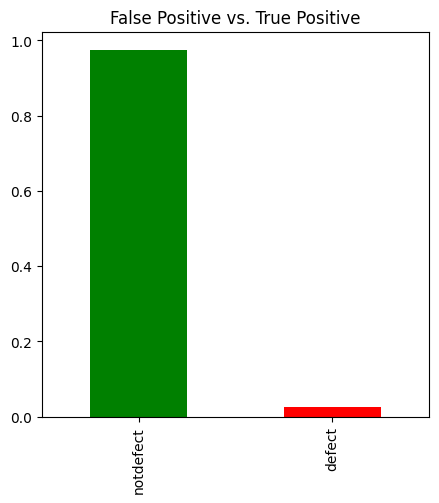

In [13]:
# DO NOT CHANGE THIS CELL
# plot bar graph of percent of true positive and false positive
df['true_defect'].value_counts(normalize=True) \
                 .plot(kind='bar', 
                       figsize=(5, 5), 
                       title='False Positive vs. True Positive', 
                       color=['g', 'r'])

By plotting false positives and true positives together, we can clearly see that true defects represent a much smaller proportion of the data. 

<img src='images/tip.png' width=720>

In real production, **dppm (defect parts per million)** rates are typically less than 100 dppm or 10 dppm for safety-critical applications. While we can't determine dppm without knowing how many products are produced, we should target less than 1 dppm, particularly for safety critical applications such as those in the automotive industry. Using the power of artificial intelligence, we can accurately and efficiently identify defective products and send them to repair. 

Next, we'll look into how defect count has changed over time. 

<AxesSubplot: xlabel='date'>

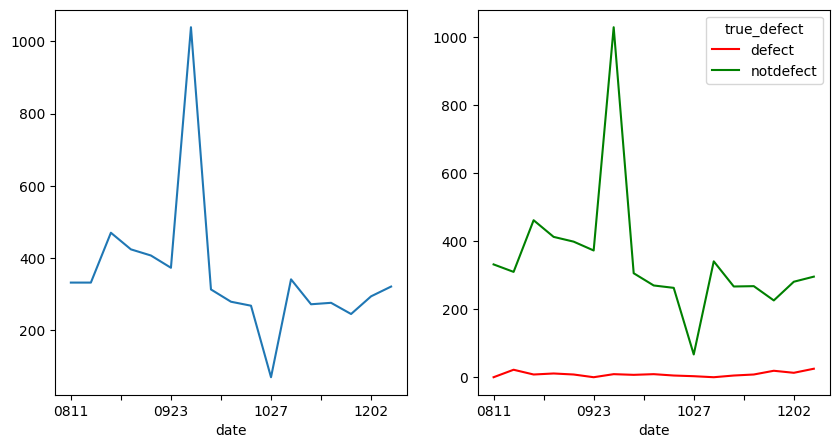

In [14]:
# DO NOT CHANGE THIS CELL
# plot total defect count by time
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
df.groupby('date') \
  .size() \
  .plot(ax=ax[0])

# plot true positive and false positive count by time
date_df=df.pivot_table(index='date', columns='true_defect', aggfunc='size', fill_value=0)
date_df.plot(ax=ax[1], color=['r', 'g'])

The total number of potential defects changes over time, while the amount of true defects have stayed consistently **low**. It highlights some of the challenges with rules-based AOI algorithms as they are highly sensitive and requires constant tuning. The data suggest that the AOI machines tested abnormally high and low potential defect counts on _09/30_ and _10/27_. While they have been quickly resolved, it meant that the human operators bare the impact of an unpredictable workload. 

We can also visualize the percent of potential defects that were identified as actual defects by the human operators. 

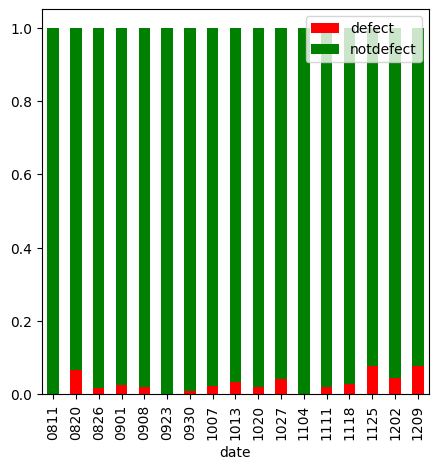

In [15]:
# DO NOT CHANGE THIS CELL
# plot true positive and false positive percentage over time
date_df.div(date_df.sum(axis=1), axis=0).plot(kind='bar', figsize=(5, 5), stacked=True, color=['r', 'g'])
plt.legend(loc='upper right')

<a name='s1-e2'></a>
### Exercise #2 - Count by Component Type ###
Let's see which component type has the highest number of defects. 

**Instructions**: <br>
* Modify the `<FIXME>` only and execute below cell to determine the top 5 component types that the AOI machine tested defects for. 
* Execute the cell below to plot the defect counts by component type. 

In [16]:
# group by first letter of component id and plot the number of records
top_five_component_types=df.groupby('comp_type') \
                           .size() \
                           .sort_values(ascending=False) \
                           .head(5) \
                           .index

print('The top 5 component types are: {}'.format(list(top_five_component_types)))

The top 5 component types are: ['C', 'U', 'Q', 'R', 'L']


<AxesSubplot: title={'center': 'Number of Components Tested Positive by Type'}, xlabel='comp_type'>

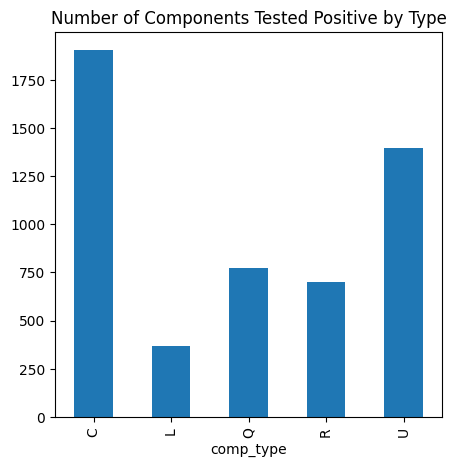

In [17]:
# DO NOT CHANGE THIS CELL
# filter dataframe by top 5 component types
top_five_component_types_df=df[df['comp_type'].isin(top_five_component_types)]

# plot defect counts by type
top_five_component_types_df.groupby('comp_type') \
                           .size() \
                           .plot(kind='bar', 
                                 figsize=(5, 5), 
                                 title='Number of Components Tested Positive by Type')

Click ... to show **solution**. 

If we show the total defect counts over time by component type, we can observe an interesting dynamic. 

<AxesSubplot: title={'center': 'Weekly True Positive Defect Count by Component Type'}, xlabel='date'>

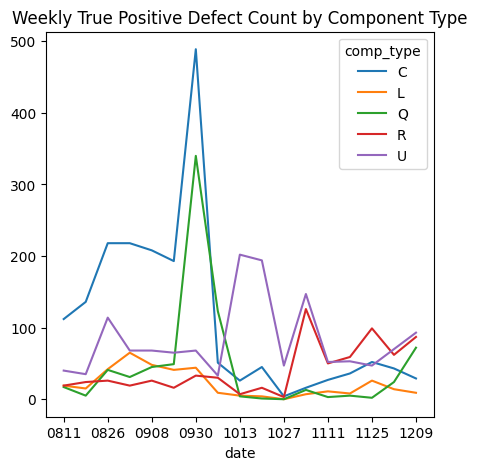

In [18]:
# DO NOT CHANGE THIS CELL
# pivot dataframe by date and component type to see the trend
top_five_component_types_df=df[df['comp_type'].isin(top_five_component_types)]
top_five_component_types_df.pivot_table(index='date', columns=df['comp_type'], aggfunc='size', fill_value=0) \
                           .plot(figsize=(5, 5), 
                                 title='Weekly True Positive Defect Count by Component Type')

<p><img src='images/important.png' width=720></p>

Based on the above, we see that the change-over-time of potential defect counts can be specific to component types. There could be a number of reasons why the AOI machines are testing more potential defective components, including supplier, manufacturing, or the AOI machines themselves. To accommodate changes to the environment, the parameters of AOI machines get tweaked continuously depending on the business needs. As an example, we observe a drop in capacitors and transistors on _09/30_, which may have cause the uptick in integrated circuits and resistors. This is a realistic scenario for any manufacturing line.

We can also view the similar information but separated by true positive vs. false positive. 

<AxesSubplot: xlabel='comp_type'>

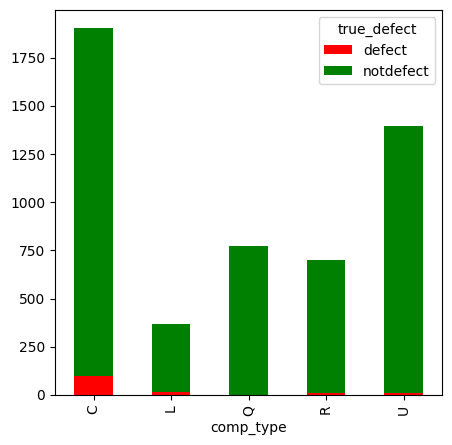

In [19]:
# DO NOT CHANGE THIS CELL
# group by component type and plot true positive vs. false positive
top_five_component_types_df.pivot_table(index=df['comp_type'], columns='true_defect', aggfunc='size') \
                           .plot(kind='bar', 
                                 stacked=True, 
                                 figsize=(5, 5), 
                                 color=['r', 'g'])

<AxesSubplot: title={'center': 'Weekly True Positive Defect Count by Component Type'}, xlabel='date'>

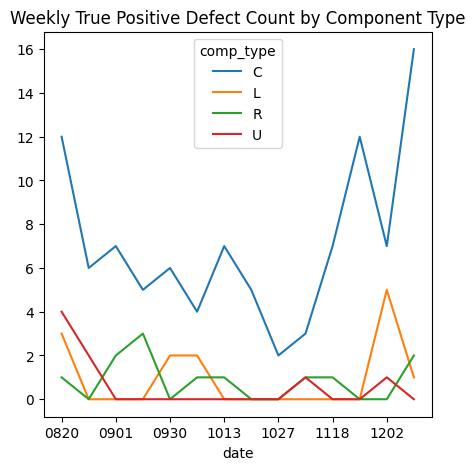

In [20]:
# DO NOT CHANGE THIS CELL
# pivot dataframe by date and component type to see the trend
top_five_component_types_df[top_five_component_types_df['true_defect']=='defect'].pivot_table(index='date', columns=df['comp_type'], aggfunc='size', fill_value=0) \
                                                                                 .plot(figsize=(5, 5), 
                                                                                       title='Weekly True Positive Defect Count by Component Type')

There are a lot of defects reported for capacitors. 

<a name='s1-3.4'></a>
### Visualizing the Dataset ###
Let's preview some of the images to see if we can identify some clear patterns that will help us identify defective and non-defective capacitors. The `initial_spot` function below, plots sample images of a given dataframe.

In [21]:
# DO NOT CHANGE THIS CELL
# define function plot sample df
def view_samples(pcba_df):
    '''
    plot unique images to check how true positives or false positive images look like in the provided dataframe 
    (to get a feeling on whether it make sense to develop a DL algorithm to classify them)
    
    param: 
        pcba_df: the original dataframe
    return: 
        none
    '''
    plt.figure(figsize=(30, 30))
    num_cols = 10
    # get the number of unique capacitors based on the component name (ID)
    num_unique_cap = len(pcba_df['comp_id'].unique())
    num_rows = math.ceil(num_unique_cap / num_cols)
    
    # use mpimg.imread to read the extracted image path
    # and plt.imshow to display image inside the subplot.
    for index, c_name in enumerate(pcba_df['comp_id'].unique()):
        image_path = pcba_df[pcba_df['comp_id'] == c_name]['defect_img_path'].values[0]
        plt.subplot(num_cols, num_rows, index+1)
        # assign the image name to the subplot
        plt.title(c_name)
        plt.imshow(mpimg.imread(image_path))
        plt.axis('off')

<a name='s1-e3'></a>
### Exercise #3 - Plot False Positive Samples ###
Let's preview some false positive samples. 

**Instructions**:<br>
* Modifying the `<FIXME>` only and execute the cell below to plot some false positive samples. 
* Note any common visual theme for false positive samples in the cell below. 

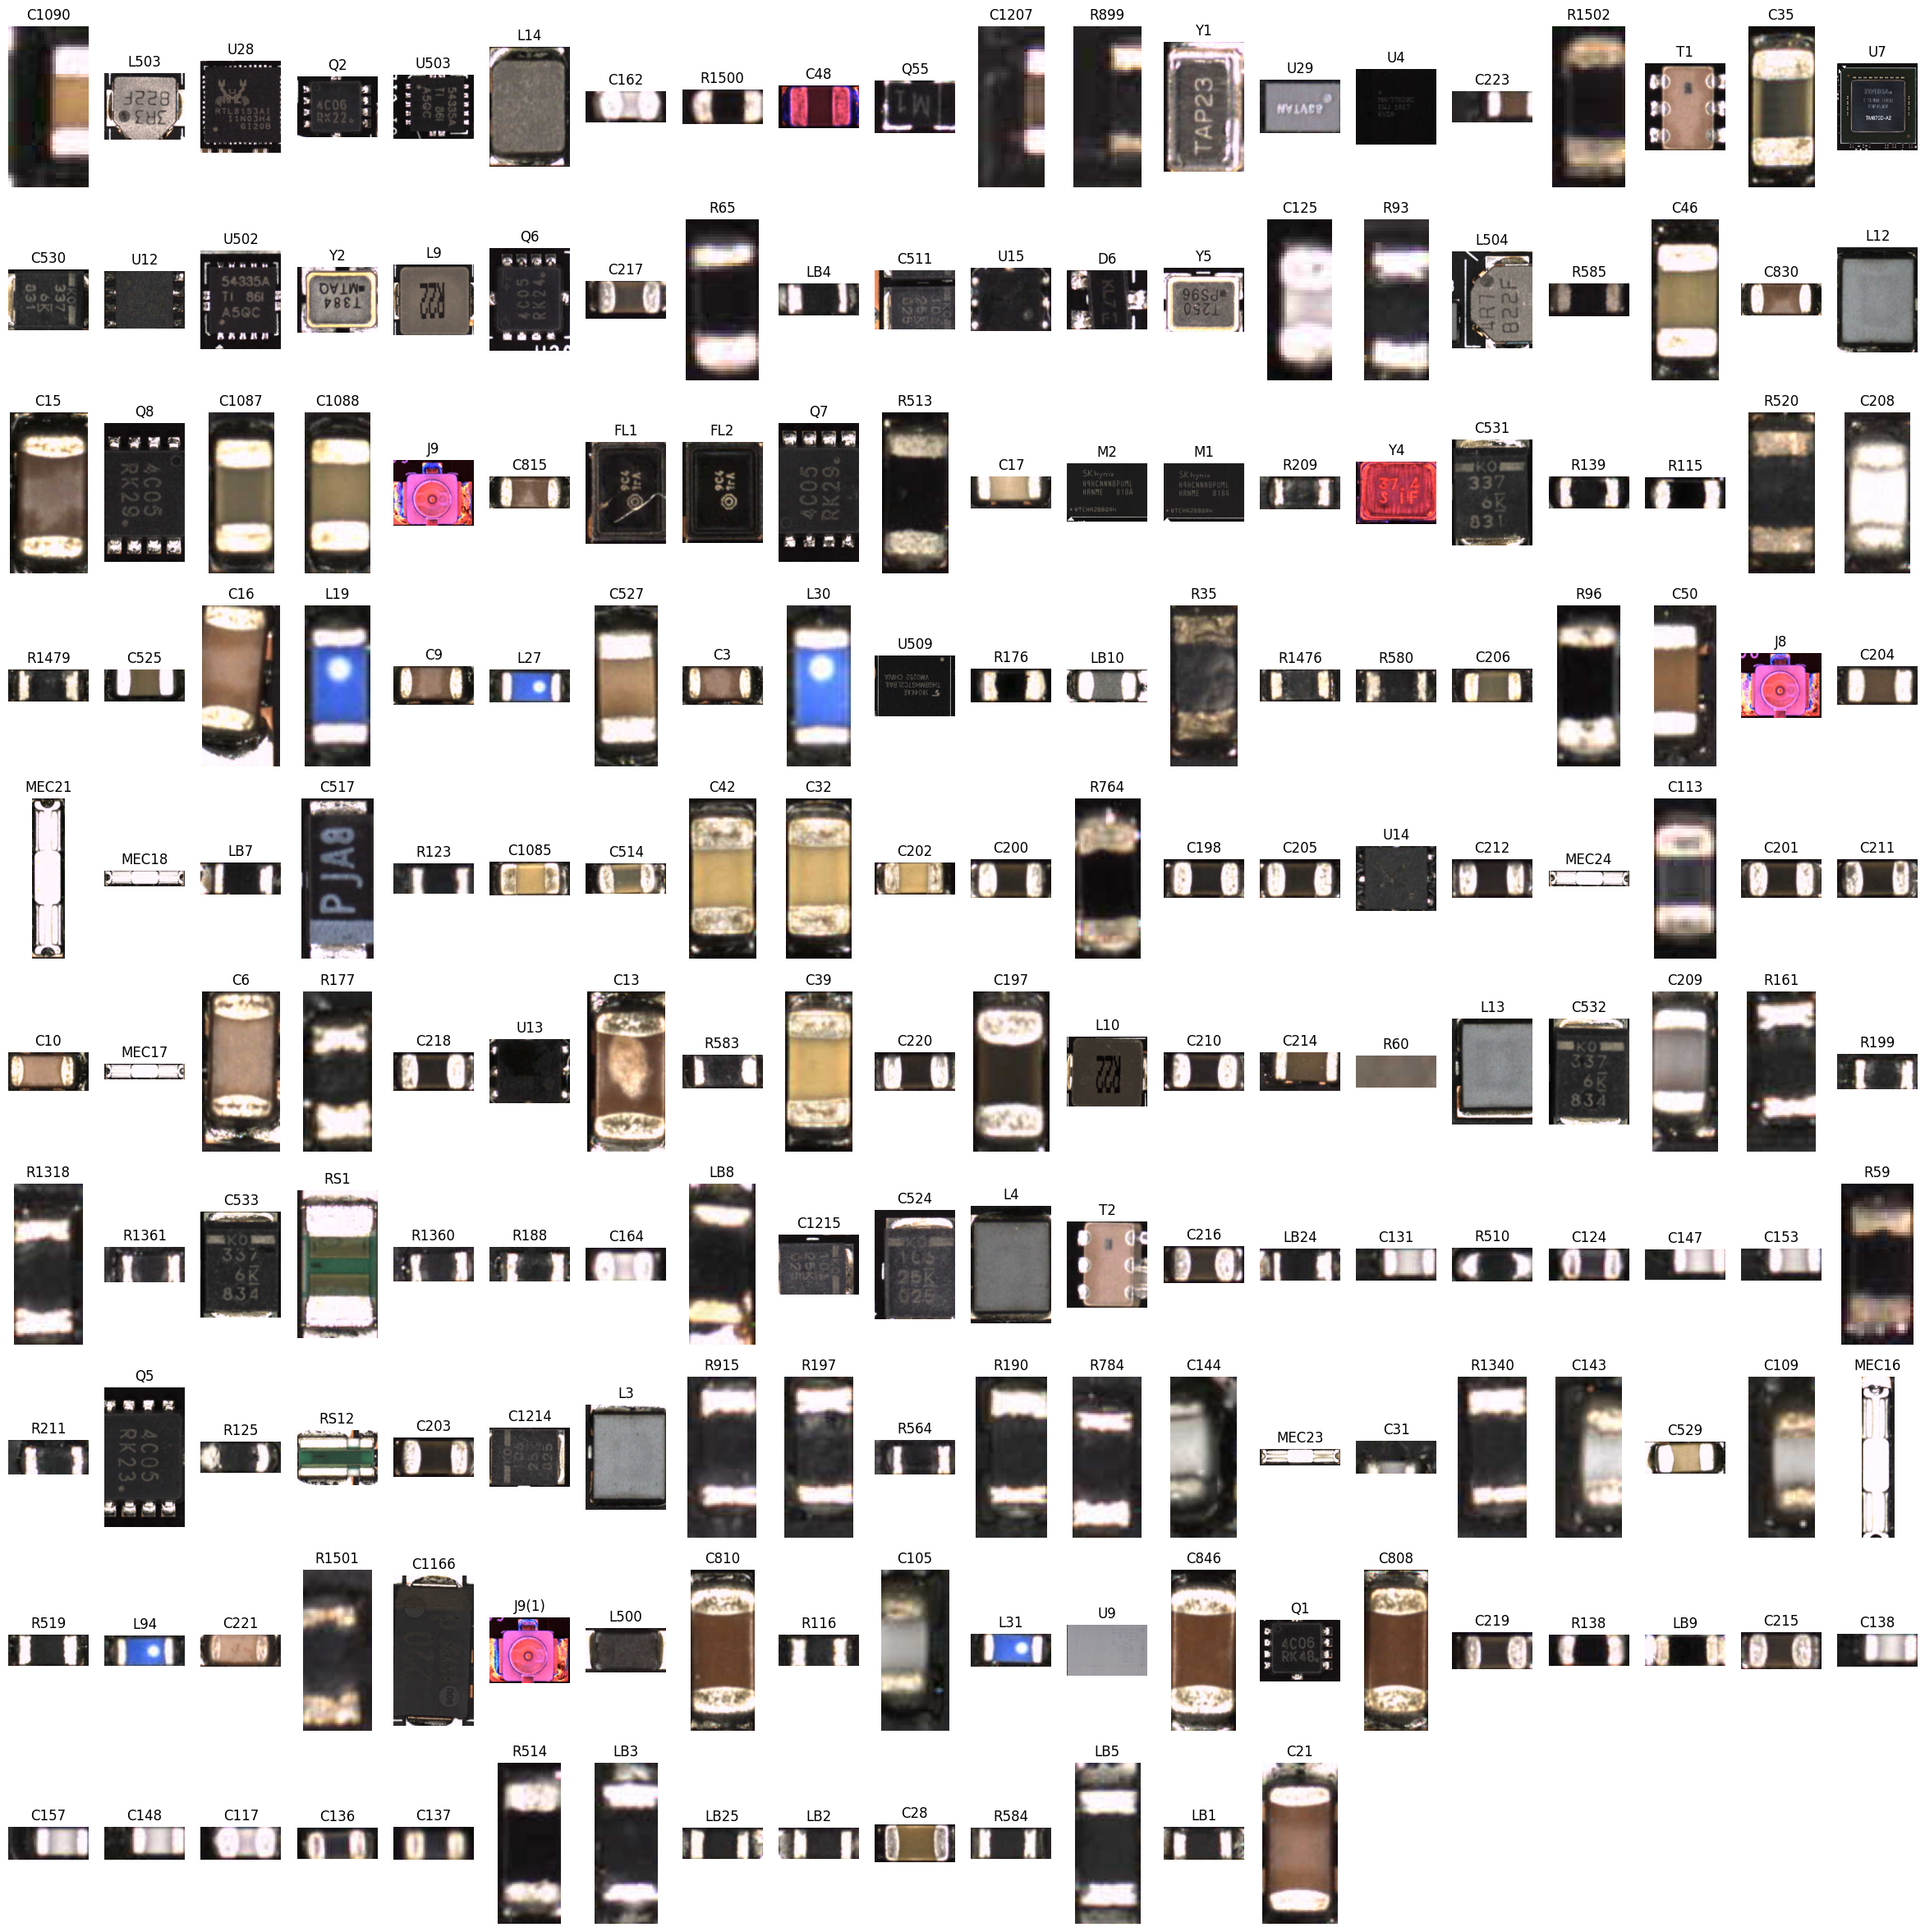

In [23]:
view_samples(pcba_df = df[df['true_defect']=='notdefect'])

Click ... to see **solution**. 

<a name='s1-e4'></a>
### Exercise #4 - Plot True Positive Samples ###
Let's preview some true positive samples. 

**Instructions**:<br>
* Modifying the `<FIXME>` only and execute the cell below to plot some true positive samples. 
* Note any common visual theme for true positive samples in the cell below. 

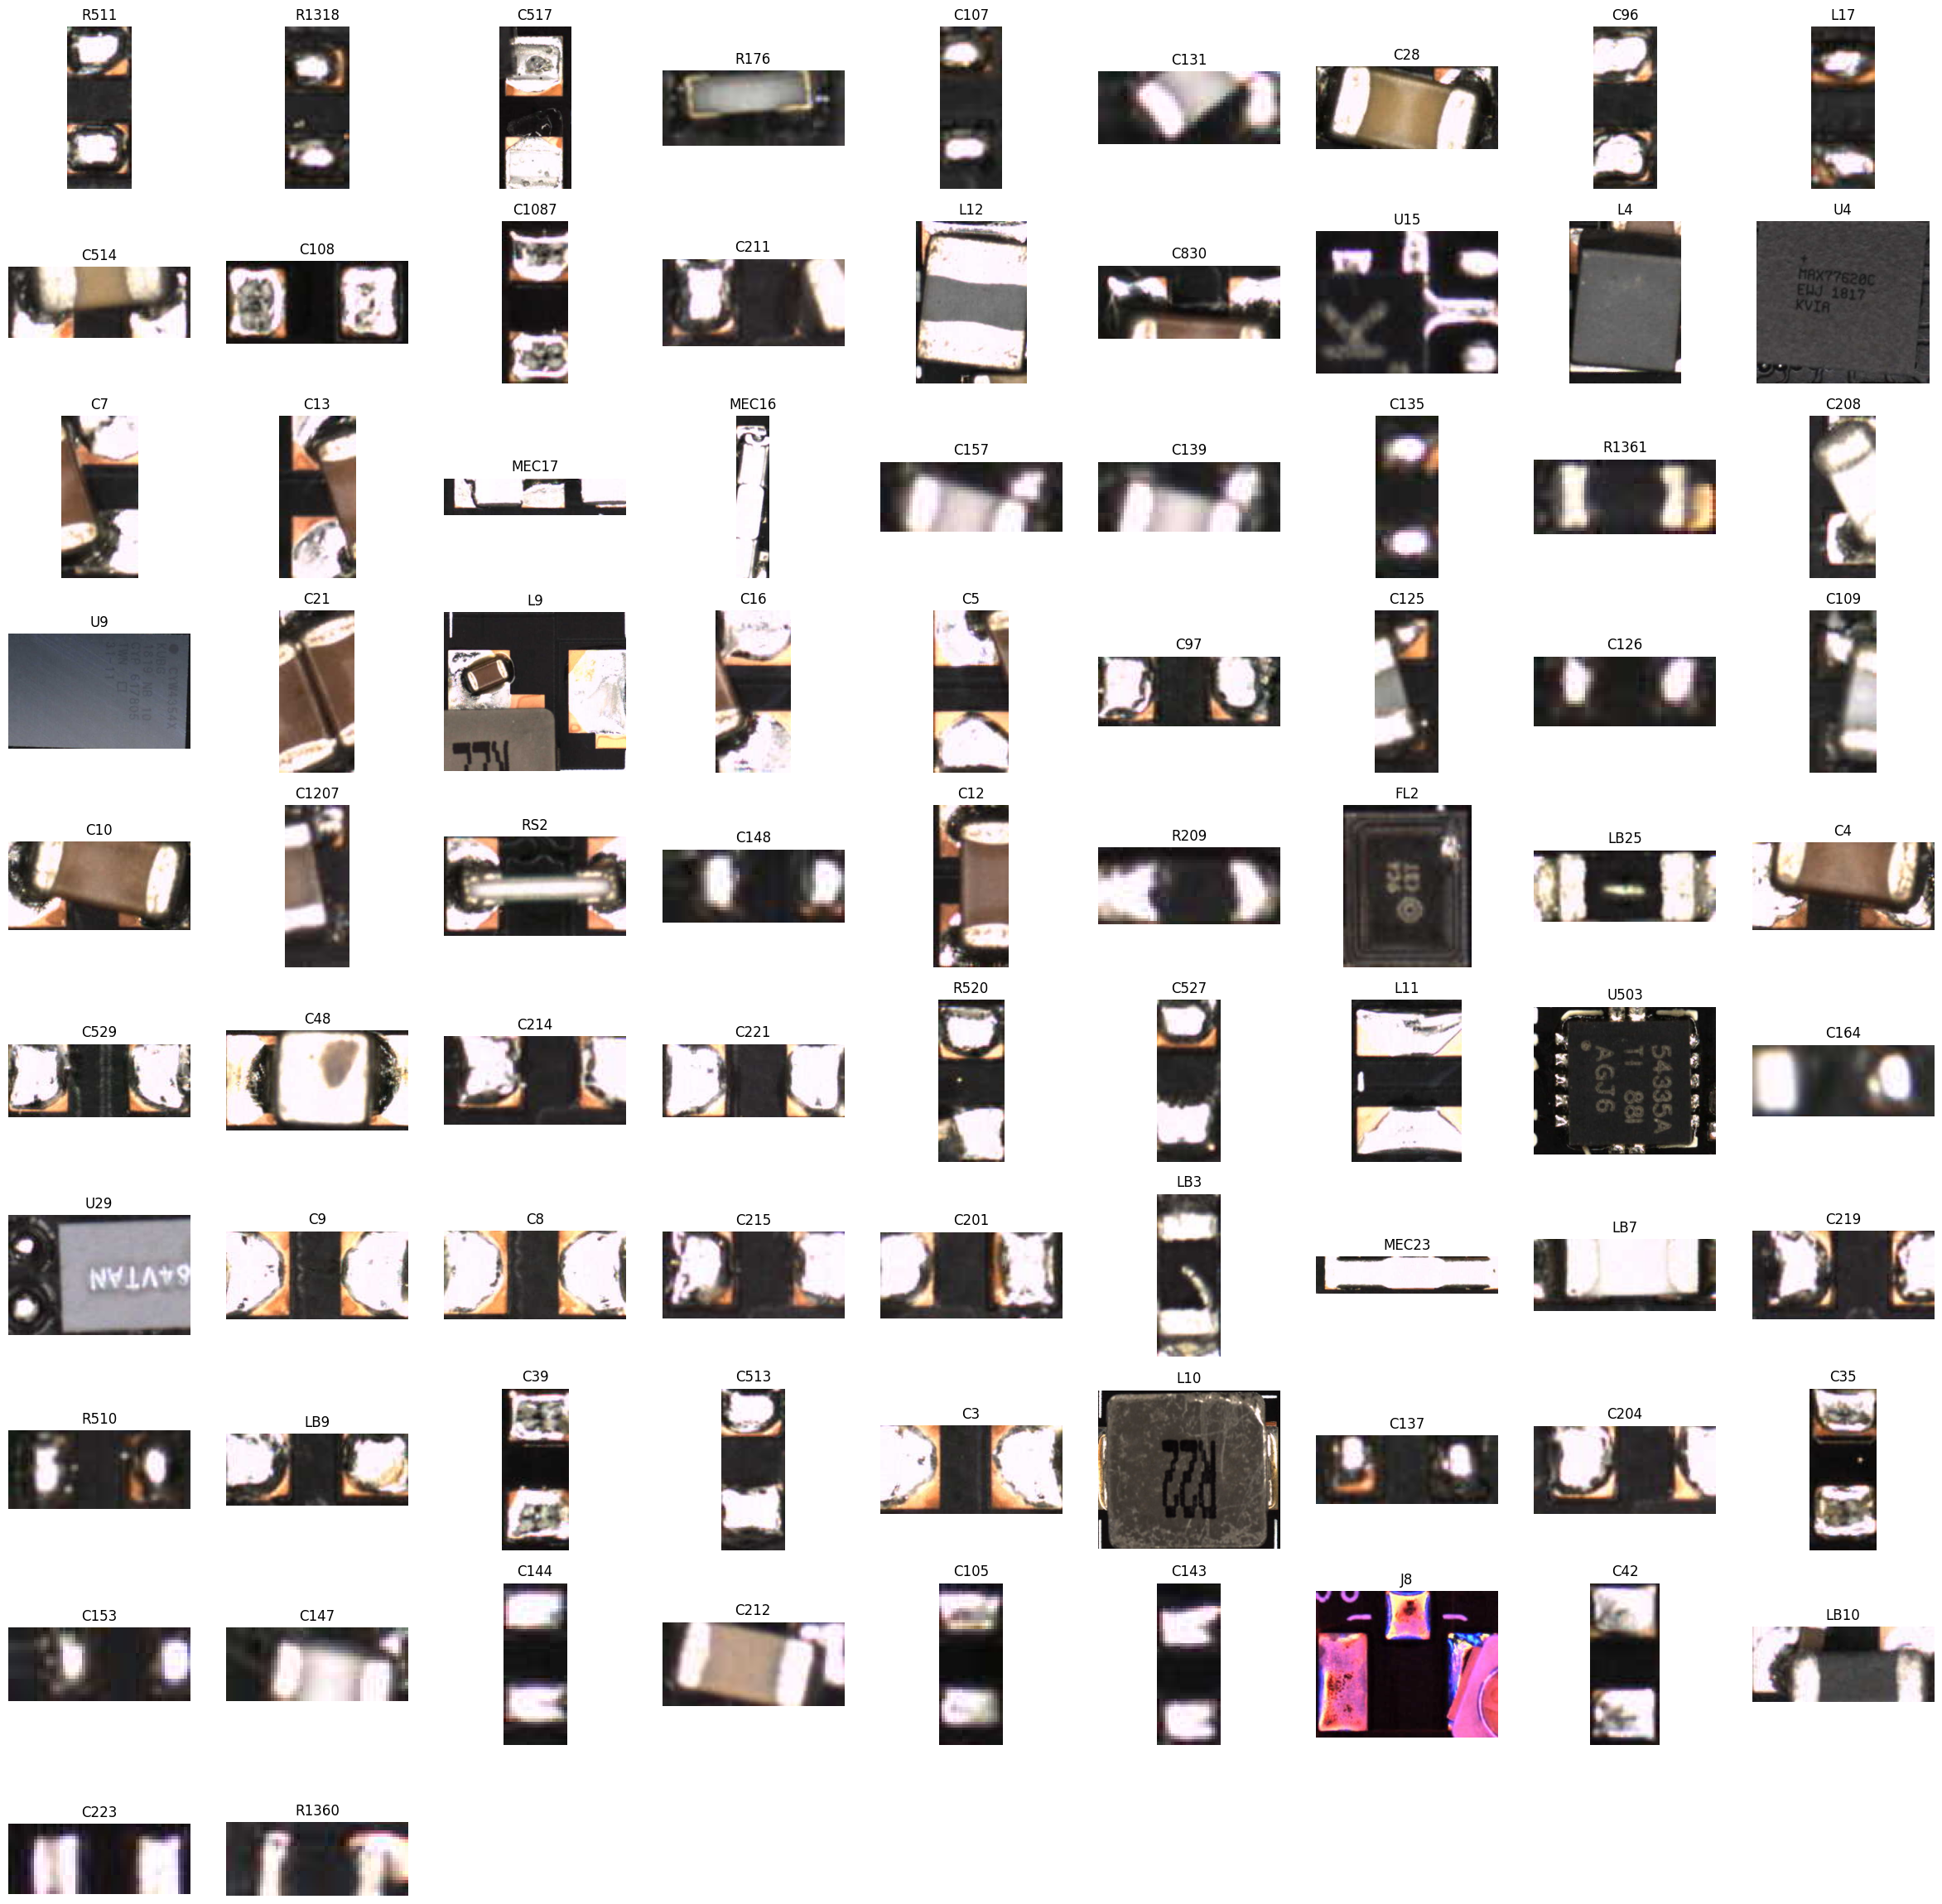

In [24]:
view_samples(pcba_df = df[df['true_defect']=='defect'])

Click ... to see **solution**. 

<a name='s1-4'></a>
## Scoping the Project ##
Before kicking off the model development process, it is important to scope the project to produce fast feasibility testing in a short period of time, i.e., 3 to 6 months. Ideally, we would like to build a model that is capable of classifying defects for all components of our PCBA scenario. However, defining a project to deal with all components and all defect types might be too ambitious and take a longer time to produce promising results. That might not align with the timeline and restrictions of the project and demands of management. Furthermore, an AI project is usually a multi-disciplined one, where field operations team including AOI technicians/engineers, data scientist, and AI engineers collaborate to produce meaningful results. Moreover, human operators, who are familiar with defect patterns, are needed to label and document the true defects. This also takes lots of time and patience. 

NVIDIA's manufacturing team asked the development team to focus on reducing false positives of capacitors by using deep learning. It is very important to emphasize listening to your internal customers' voice to get executive support for a data collection campaign and resource allocation during project planning. In this example, we will focus on automating __defect detection of capacitors__, a cause of higher false positives than other components in PCBAs. Below is the zoomed-in picture of capacitors in a PCBA.
<p><img alt='Figure. Capacitors in PCBA' src="images/Capacitor_PCB.jpg" width=720></p>

Next, we will take a look at the new dataframe containing **capacitors** only.

<p><img src='images/tip.png' width=720></p>
While we scope the project to be limited to capacitors, you may also consider looking at other component types once you've finished the workshop. Integrated circuits (U) is a great candidate for practice purposes to hone your skills while the other component types may lack the data size needed to build a robust deep learning model. 

In [25]:
# DO NOT CHANGE THIS CELL
# filter the dataframe to only include Capacitors
capacitor_df=df[df['comp_type']=='C']

# preview capacitor dataframe
capacitor_df.head()

true_defect                                    defect_img_path  date  \
0   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026324/...  0908   
1   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026269/...  0908   
4   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026523/...  0908   
5   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026331/...  0908   
6   notdefect  /dli/task/data/AOI_DL_data_0908/0423318026211/...  0908   

           board comp_id    img_shape defect_image_name comp_type  
0  0423318026324   C1090  (54, 27, 3)      D0_C1090.jpg         C  
1  0423318026269   C1090  (54, 27, 3)      D1_C1090.jpg         C  
4  0423318026523   C1090  (54, 27, 3)      D1_C1090.jpg         C  
5  0423318026331   C1090  (54, 27, 3)      D1_C1090.jpg         C  
6  0423318026211   C1090  (53, 27, 3)      D1_C1090.jpg         C

<a name='s1-e5'></a>
### Exercise #5 - Calculating Current AOI Error Rate ###
Let's calculate the percentage of potential defects that are false positive for the current AOI machine for capacitors. 

**Instructions**: <br>
* Modify the `<FIXME>` only and execute below cell to generate a bar chart, along with annotated error rate. 
* Answer the question in the cell below regarding the [false discovery rate](https://en.wikipedia.org/wiki/False_discovery_rate). 

notdefect    0.947977
defect       0.052023
Name: true_defect, dtype: float64

<AxesSubplot: title={'center': 'False Positive vs. True Positive'}>

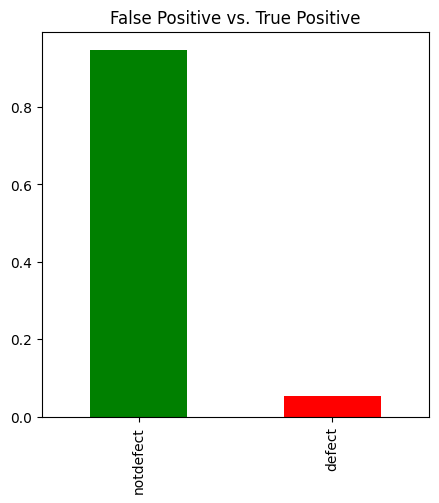

In [27]:
# display the normalized counts of false positive and true positive for capacitors
display(capacitor_df['true_defect'].value_counts(normalize=True))

# plot the distribution of false positive and true positive for capacitors
capacitor_df['true_defect'].value_counts(normalize=True) \
                           .plot(kind='bar', 
                                 figsize=(5, 5), 
                                 title='False Positive vs. True Positive', 
                                 color=['g', 'r'])

Click ... to show **solution**. 

<p><img src='images/important.png' width=720></p>

The percentage of potential defects that are true positive does not reflect the defect rate. In order to calculate the defect rate, we would also need to know the number of total PCBA production. 

We will save a copy of the dataframe as `capacitors_df.csv` for later use. 

In [28]:
# DO NOT CHANGE THIS CELL
# save a copy of dataframe
capacitor_df.to_csv('capacitor_df.csv', index=False)

<p><img src='images/tip.png' width=720></p>

Contrary to this DLI example, an excel data file containing various sensor outputs from manufacturing lines can be easily over 100 GBytes. Loading this data file can take a lot of time on a CPU. NVIDIA's RAPIDS is an open-source software library for end-to-end data science and machine learning analytics pipeline. Take a moment to visit [RAPIDS](https://rapids.ai/).

<a name='s1-5'></a>
## Data Pre-processing with DALI ##
Deep learning models require vast amounts of data to produce accurate predictions, and this need becomes more significant as models grow in size and complexity. Regardless of the model, some degree of pre-processing is required for training and inference. In computer vision applications, the pre-processing usually includes decoding, resizing, and normalizing to a standardized format accepted by the neural network. Data preprocessing for deep learning workloads has garnered little attention until recently, eclipsed by the tremendous computational resources required for training complex models. These pre-processing routines, often referred to as pipelines, are currently executed on the CPU using libraries such as OpenCV, Pillow. Today’s DL applications include complex, multi-stage data processing pipelines consisting of many serial operations. Relying on the CPU to handle these pipelines have become a bottleneck that limits performance and scalability. 
<p><img src='images/dali.png' width=720></p>

The **NVIDIA Data Loading Library** (DALI) is a library for data loading and pre-processing to accelerate deep learning applications. It provides a collection of highly optimized building blocks for loading and processing image, video, and audio data. DALI addresses the problem of the CPU bottleneck by offloading data preprocessing to the GPU. In addition, it offers some powerful features: 
* DALI offers data processing primitives for a variety of deep learning applications. The supported input formats include most used image file formats. 
* DALI relies on its own execution engine, built to maximize the throughput of the input pipeline. 
* It can be used as a portable drop-in replacement for built-in data loaders and data iterators in popular deep learning frameworks. 
* Features such as prefetching, parallel execution, and batch processing are handled transparently for the user. 
* Different deep learning frameworks have multiple data pre-processing implementations, resulting in challenges such as portability of training and inference workflows, and code maintainability. Data processing pipelines implemented using DALI are portable because they can easily be retargeted to TensorFlow, PyTorch, MXNet and PaddlePaddle.
* Often the pre-processing routines that are used for inference are like the ones used for training, therefore implementing both using the same tools can save you some boilerplate and code repetition. 

<a name='s1-5.1'></a>
###  DALI Pipeline ###
At the core of data processing with DALI lies the concept of a data processing `pipeline`. It is composed of multiple operations connected in a directed graph and contained in an object of class `nvidia.dali.Pipeline`. This class provides functions necessary for defining, building, and running data processing pipelines. Each operator in the pipeline typically gets one or more inputs, applies some kind of data processing, and produces one or more outputs. There are special kinds of operators that don’t take any inputs and produce outputs. Those special operators act like a data source – _readers_, _random number generators_ and _external source_ fall into this category. 

DALI offers CPU and GPU implementations for a wide range of processing operators. The availability of a CPU or GPU implementation depends on the nature of the operator. Make sure to check the documentation for an [up-to-date list of supported operations](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/#operations), as it is expanded with every release. The easiest way to define a DALI pipeline is using the `pipeline_def` Python [decorator](https://peps.python.org/pep-0318/). To create a pipeline, we define a function where we instantiate and connect the desired operators and return the relevant outputs. Then just decorate it with `pipeline_def`. Let's start with defining a very simple pipeline, which will have two operators. The first operator is a file reader (`fn.readers.file`) that discovers and loads files contained in a directory. The reader outputs both the contents of the files (in this case, JPGs) and the labels. The file reader can be used to infer file-label pairs from the directory structure. The second operator is an [image decoder](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/supported_ops.html#nvidia.dali.fn.decoders.image) (`fn.decoders.image`). Lastly, we return the image and label pairs. In the `simple_pipeline` function we define the operations to be performed and the flow of the computation between them. For more information about `pipeline_def` look to the [documentation](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/pipeline.html?#nvidia.dali.pipeline_def). 

In [29]:
# DO NOT CHANGE THIS CELL
# import dependencies
from matplotlib import gridspec
from nvidia.dali.pipeline import Pipeline
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types
from PIL import Image
import warnings

warnings.filterwarnings("ignore")

In [30]:
# DO NOT CHANGE THIS CELL
batch_size=8
defect_label_map={'notdefect': 1, 'defect': 0}
defect_inverse_map={v: k for k, v in defect_label_map.items()}
sample=capacitor_df.groupby('true_defect', group_keys=False).apply(lambda x: x.sample(n=batch_size))

@pipeline_def
def simple_pipeline():
    # use fn.readers.file to read encoded images and labels from the hard drive
    jpgs, labels=fn.readers.file(files=sample['defect_img_path'].to_list(), labels=sample['true_defect'].map(defect_label_map).to_list())
    # use the fn.decoders.image operation to decode images from JPG to RGB
    images=fn.decoders.image(jpgs, device='cpu')
    # specify which of the intermediate variables should be returned as the outputs of the pipeline
    return images, labels

In order to use the pipeline defined with `simple_pipeline`, we need to create and build it. This is achieved by calling `simple_pipeline()`, which creates an instance of the pipeline. Then we call `build()` on this newly created instance:

In [31]:
# DO NOT CHANGE THIS CELL
# create and build pipeline
pipe=simple_pipeline(batch_size=batch_size*2, num_threads=4, device_id=0)
pipe.build()

<p><img src='images/important.png' width=720></p>

Notice that decorating a function with `pipeline_def` adds new named arguments to it. They can be used to control various aspects of the pipeline, such as batch size, number of threads used to perform computation on the CPU, and which GPU device to use (though pipeline created with simple_pipeline does not yet use GPU for compute). For more information about `Pipeline` arguments you can look to [Pipeline documentation](https://docs.nvidia.com/deeplearning/dali/user-guide/docs/pipeline.html). 

Once built, a pipeline instance runs in an [asynchronous](https://en.wikipedia.org/wiki/Asynchrony_(computer_programming)) fashion by calling the pipeline's `run()` method to get a batch of results. We unpack the results into `images` and `labels` as expected. Both of these elements contain a list of tensors. 

In [32]:
# DO NOT CHANGE THIS CELL
# run the pipeline
simple_pipe_output=pipe.run()

images, labels=simple_pipe_output
print("Images is_dense_tensor: " + str(images.is_dense_tensor()))
print("Labels is_dense_tensor: " + str(labels.is_dense_tensor()))

Images is_dense_tensor: False
Labels is_dense_tensor: True


In order to see the images, we will need to loop over all tensors contained in `TensorList`, accessed with its `at` method.

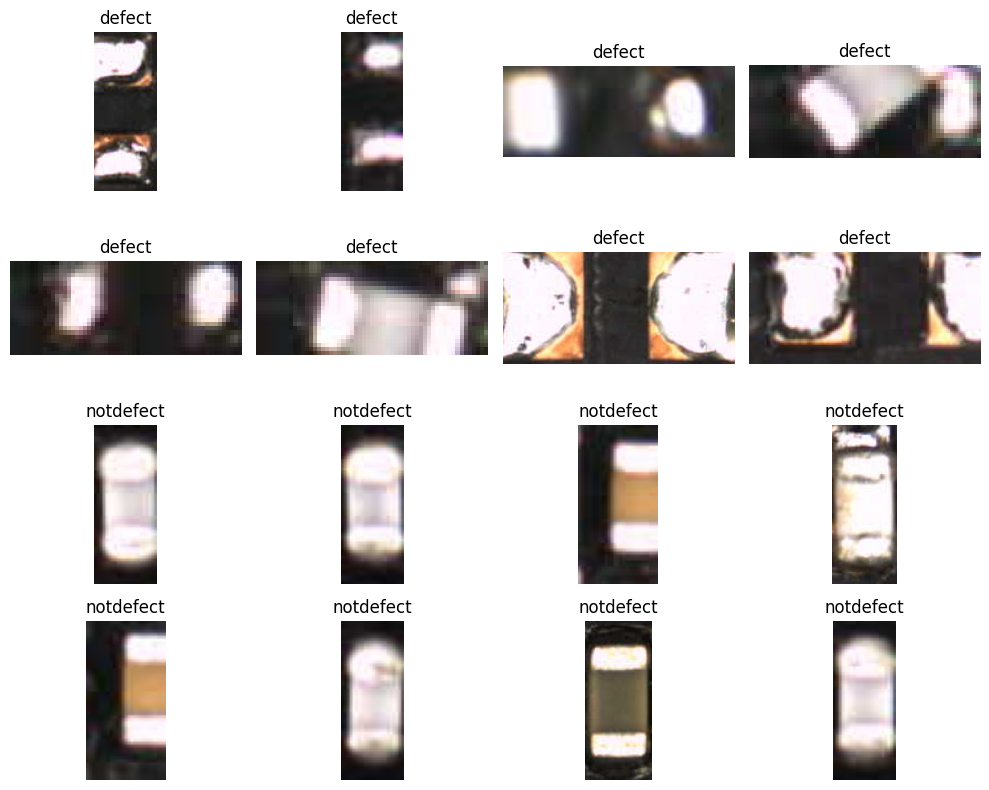

In [33]:
# DO NOT CHANGE THIS CELL
# define a function display images
def show_images(image_batch, label_batch):
    columns=4
    rows=math.ceil(len(image_batch)/columns)
    # create plot
    fig=plt.figure(figsize=(10, (10 // columns) * rows))
    gs=gridspec.GridSpec(rows, columns)
    for idx in range(rows*columns):
        plt.subplot(gs[idx])
        plt.axis("off")
        plt.imshow(image_batch.at(idx))
        plt.title(defect_inverse_map[label_batch.at(idx)[0]])
    plt.tight_layout()

show_images(images, labels)

<a name='s1-5.2'></a>
### Data Augmentation ###
Deep learning models require training with vast amounts of data to achieve accurate results. DALI can not only read images from disk and batch them into tensors, it can also perform various augmentations on those images to improve deep learning training results. [Data augmentation](https://en.wikipedia.org/wiki/Data_augmentation) artificially increases the size of a dataset by introducing random disturbances to the data, such as _geometric deformations_, _color transforms_, _noise addition_, and so on. These disturbances help produce models that are more robust in their predictions, avoid overfitting, and deliver better accuracy. We will use DALI to demonstrate data augmentation that we will introduce for model training, such as _cropping_, _resizing_, and _flipping_. 
<p><img src='images/augmentation.png' width=720></p>

In [34]:
# DO NOT CHANGE THIS CELL
@pipeline_def
def augmentation_pipeline():
    # use fn.readers.file to read encoded images and labels from the hard drive
    jpgs, labels=fn.readers.file(files=sample['defect_img_path'].to_list(), labels=sample['true_defect'].map(defect_label_map).to_list())
    # use the fn.decoders.image operation to decode images from JPG to RGB
    images=fn.decoders.image(jpgs, device='cpu')
    # use the fn.rotate operation to rotate image
    rotated_images = fn.rotate(images.gpu(), angle=45, fill_value=0)
    return rotated_images, labels

In [35]:
# DO NOT CHANGE THIS CELL
augmentation_pipe=augmentation_pipeline(batch_size=batch_size*2, num_threads=4, device_id=0)
augmentation_pipe.build()

<p><img src='images/important.png' width=720></p>

DALI does not support moving the data from the GPU to the CPU within the pipeline. That is why a CPU operation cannot follow a GPU one. The `augmentation_pipe_output` contains 2 TensorLists, one of which being the result of the `rotate` operation, which is on the GPU. Since we cannot access contents of `TensorListGPU` directly from the CPU, we need to copy it to the CPU by using `as_cpu` method in order to show the results.

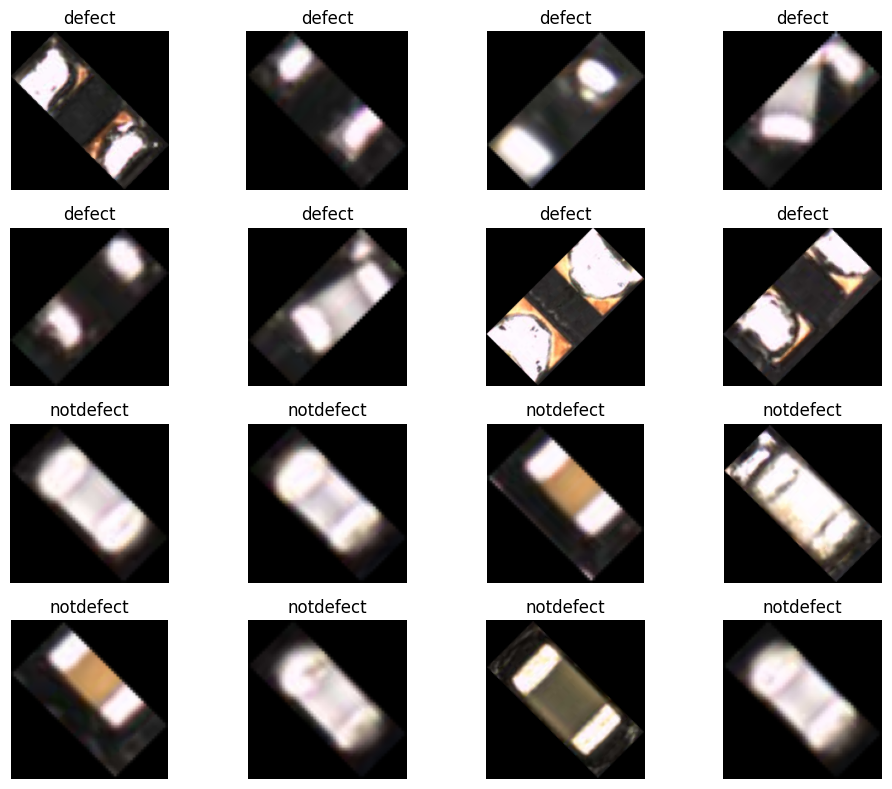

In [36]:
# DO NOT CHANGE THIS CELL
augmented_images, labels=augmentation_pipe.run()
show_images(augmented_images.as_cpu(), labels)

**Well Done!** When you're finished, please complete the assessment before moving onto the next lab. 

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/></a>